In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('jazz.csv', sep='|')

In [3]:
# Define features to analyze
features = [
            'danceability',
            'energy',
            'speechiness',
            'acousticness',
            'instrumentalness',
            'liveness',
            'valence',
            'num_samples',
            'end_of_fade_in',
            'start_of_fade_out',
            'loudness',
            'tempo',
            'key',
            'mode',
            'bars_num',
            'bars_duration_mean',
            'bars_duration_var',
            'beats_num',
            'beats_duration_mean',
            'beats_duration_var',
            'sections_num',
            'sections_duration_mean',
            'sections_duration_var',
            'loudness_var',
            'tempo_var',
            'key_var',
            'mode_var',
            'segments_num',
            'segments_duration_var',
            'segments_duration_mean',
            'pitches_mean',
            'pitches_var',
            'timbre_mean',
            'timbre_var',
            'tatums_num',
            'tatums_duration_mean',
            'tatums_duration_var'
           ]

feat_df = df[features].copy()

## Data contains features that are likely correlated to various degrees, for example number of bars and beats. Let's therefore start the analysis by looking at correlations

In [4]:
# Heatmap functions for correlation analysis taken (with slight modifications) from this article:
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# Making into class of correlation functions

class CorrAnalysis():

    def heatmap(self, x, y, **kwargs):
        
        if 'color' in kwargs:
            color = kwargs['color']
        else:
            color = [1]*len(x)
    
        if 'palette' in kwargs:
            palette = kwargs['palette']
            n_colors = len(palette)
        else:
            n_colors = 256 # Use 256 colors for the diverging color palette
            palette = sns.color_palette("Blues", n_colors) 
            
        # Range of values that will be mapped to the palette, i.e. min and max possible correlation
        if 'color_range' in kwargs:
            color_min, color_max = kwargs['color_range']
        else:
            color_min, color_max = min(color), max(color) 
    
        def value_to_color(val):
            '''Get the color from color palette based on color value.'''
            if color_min == color_max:
                return palette[-1]
            else:
                # position of value in the input range, relative to the length of the input range
                val_position = float((val - color_min)) / (color_max - color_min) 
                # bound the position betwen 0 and 1
                val_position = min(max(val_position, 0), 1) 
                # target index in the color palette
                ind = int(val_position * (n_colors - 1)) 
                return palette[ind]
    
        if 'size' in kwargs:
            size = kwargs['size']
        else:
            size = [1]*len(x)
    
        if 'size_range' in kwargs:
            size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
        else:
            size_min, size_max = min(size), max(size)
        size_scale = kwargs.get('size_scale', 500)
    
        def value_to_size(val):
            '''Get size of marker based on size value and size scale'''
            
            if size_min == size_max:
                return 1 * size_scale
            else:
                # position of value in the input range, relative to the length of the input range
                val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 
                # bound the position betwen 0 and 1
                val_position = min(max(val_position, 0), 1) 
                return val_position * size_scale
            
        if 'x_order' in kwargs: 
            x_names = [t for t in kwargs['x_order']]
        else:
            x_names = [t for t in sorted(set([v for v in x]))]
        x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    
        if 'y_order' in kwargs: 
            y_names = [t for t in kwargs['y_order']]
        else:
            y_names = [t for t in sorted(set([v for v in y]))]
        y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    
        plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
        ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot
    
        marker = kwargs.get('marker', 's')
    
        kwargs_pass_on = {
                          k:v for k,v in kwargs.items() if k not in [
                                                                     'color',
                                                                     'palette',
                                                                     'color_range',
                                                                     'size',
                                                                     'size_range',
                                                                     'size_scale',
                                                                     'marker',
                                                                     'x_order',
                                                                     'y_order'
                                                                    ]
                         }
    
        ax.scatter(
                   x = [x_to_num[v] for v in x],
                   y = [y_to_num[v] for v in y],
                   marker = marker,
                   s = [value_to_size(v) for v in size], 
                   c = [value_to_color(v) for v in color],
                   **kwargs_pass_on
                  )
        ax.set_xticks([v for k,v in x_to_num.items()])
        ax.set_xticklabels([k for k in x_to_num], rotation=90, horizontalalignment='right')
        ax.set_yticks([v for k,v in y_to_num.items()])
        ax.set_yticklabels([k for k in y_to_num])
        # Move squares to cell center
        ax.grid(False, 'major')
        ax.grid(True, 'minor')
        ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
        ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
        # Fix x and y lims to center squares properly
        ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
        ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
        ax.set_facecolor('#F1F1F1')
    
        # Add color legend on the right side of the plot
        if color_min < color_max:
            # Use the rightmost column of the plot
            ax = plt.subplot(plot_grid[:,-1]) 
            # Fixed x coordinate for the bars
            col_x = [0]*len(palette)
            # y coordinates for each of the n_colors bars
            bar_y = np.linspace(color_min, color_max, n_colors) 
    
            bar_height = bar_y[1] - bar_y[0]
            ax.barh(
                    y = bar_y,
                    width = [5]*len(palette), # Make bars 5 units wide
                    left = col_x, # Make bars start at 0
                    height = bar_height,
                    color = palette,
                    linewidth = 0
                   )
            # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
            ax.set_xlim(1, 2)
            # Hide grid
            ax.grid(False) 
            # Make background white
            ax.set_facecolor('white')
            # Remove horizontal ticks
            ax.set_xticks([]) 
            # Show vertical ticks for min, middle, and max
            ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) 
            # Show vertical ticks on the right 
            ax.yaxis.tick_right() 


    def corrplot(self, data, size_scale=500, marker='s'):
        '''Create correlation plot of dataframe data.'''
        
        corr = pd.melt(data.reset_index(), id_vars='index')
        corr.columns = ['x', 'y', 'value']
        self.heatmap(
                     corr['x'], 
                     corr['y'],
                     color = corr['value'],
                     color_range = [-1, 1],
                     palette = sns.diverging_palette(20, 220, n=256),
                     size = corr['value'].abs(),
                     size_range = [0,1],
                     marker = marker,
                     x_order = data.columns,
                     y_order = data.columns[::-1],
                     size_scale = size_scale
                    )

CorrAnalysis = CorrAnalysis()

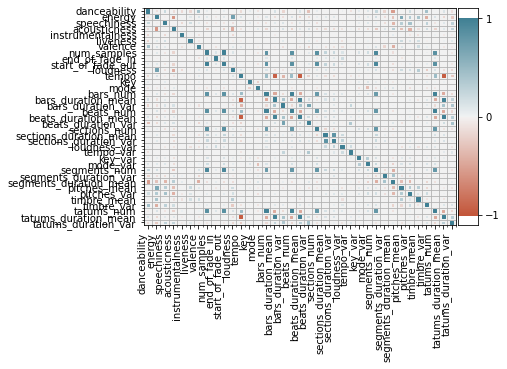

In [5]:
# Labels are a bit tough to read due to number of features, but can see that some features are highly correlated
# Tempo is negatively correlated with bars, beats, and tatums duration, and number of samples is correlated with 
# start of fade out. Lastly tatums_num seem to be correlated with a number of features as well.
CorrAnalysis.corrplot(feat_df.corr(), size_scale=10)

In [6]:
# Look closer at correlation values for bars, beats, and tatums duration with each other and tempo.

tempo_df = df[['tempo', 'bars_duration_mean', 'beats_duration_mean', 'tatums_duration_mean']].corr()

tempo_df.head()

,tempo,bars_duration_mean,beats_duration_mean,tatums_duration_mean
tempo,1.000000,-0.925689,-0.948523,-0.948359
bars_duration_mean,-0.925689,1.000000,0.971448,0.971322
beats_duration_mean,-0.948523,0.971448,1.000000,0.999993
tatums_duration_mean,-0.948359,0.971322,0.999993,1.000000


Tempo is very highly correlated with bars, duration, and tatums duration. Can probably safely remove these features from dataset and keep only tempo. 

In [7]:
# Look closer at fade in and number of samples
fade_df = df[['start_of_fade_out', 'num_samples']].corr()

fade_df.head()

,start_of_fade_out,num_samples
start_of_fade_out,1.000000,0.998748
num_samples,0.998748,1.000000


Can safely remove start_of_fade_out as well.

In [8]:
# Look closer at tatums number correlations
tatums_df = df[['tatums_num', 'segments_num', 'sections_num', 'beats_num', 'bars_num', 'num_samples']].corr()

tatums_df.head(10)

,tatums_num,segments_num,sections_num,beats_num,bars_num,num_samples
tatums_num,1.000000,0.788757,0.790025,1.000000,0.986087,0.852329
segments_num,0.788757,1.000000,0.811651,0.788756,0.763168,0.931134
sections_num,0.790025,0.811651,1.000000,0.790019,0.776438,0.872480
beats_num,1.000000,0.788756,0.790019,1.000000,0.986088,0.852325
bars_num,0.986087,0.763168,0.776438,0.986088,1.000000,0.835477
num_samples,0.852329,0.931134,0.872480,0.852325,0.835477,1.000000


Can remove tatums_num, beats_num, and segments_num as well, based on correlation >0.9

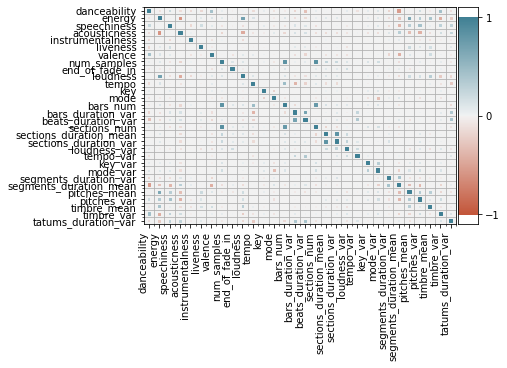

In [9]:
cols_to_drop = [
                'start_of_fade_out',
                'bars_duration_mean',
                'beats_duration_mean',
                'tatums_duration_mean',
                'tatums_num',
                'beats_num',
                'segments_num'
               ]

feat_df.drop(
             cols_to_drop,
             axis = 1,
             inplace = True
            )

CorrAnalysis.corrplot(feat_df.corr(), size_scale=10)

## Now let's take a look at the distribution of the remaining dataframes

C:\Users\Alexander\anaconda3\envs\playlistenv\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


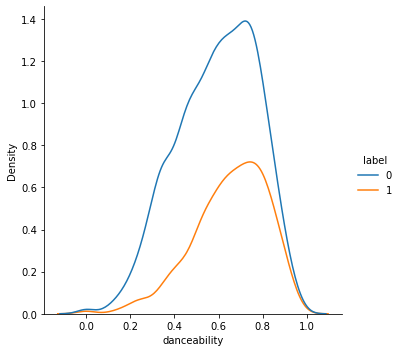

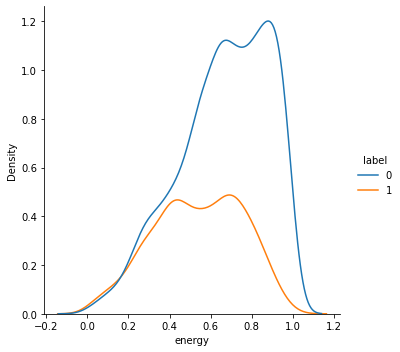

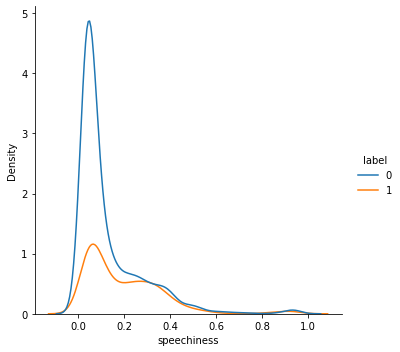

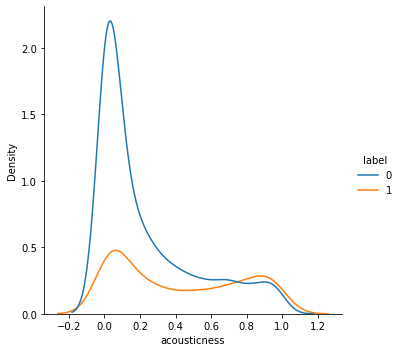

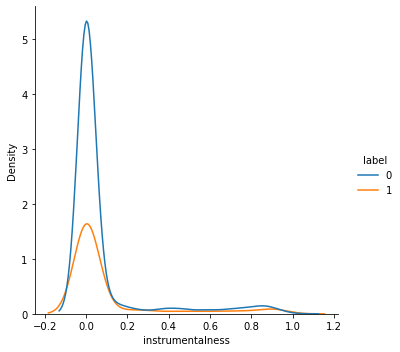

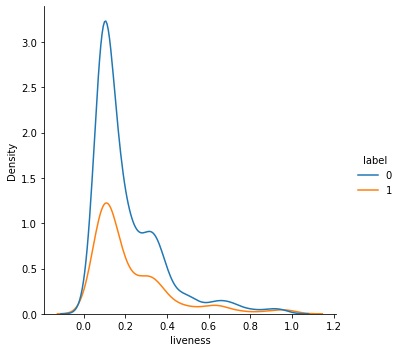

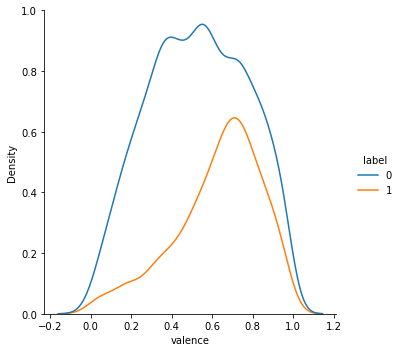

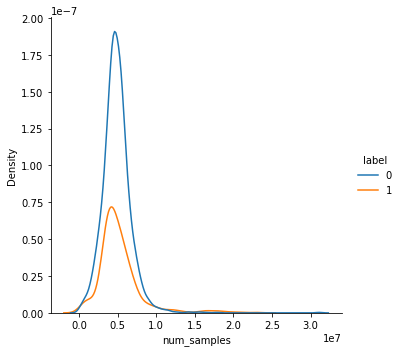

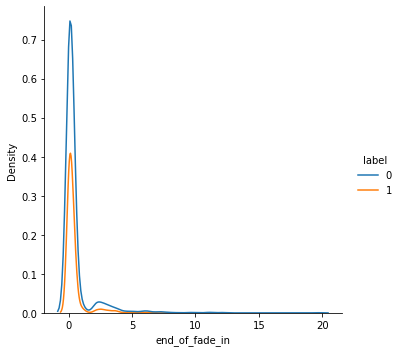

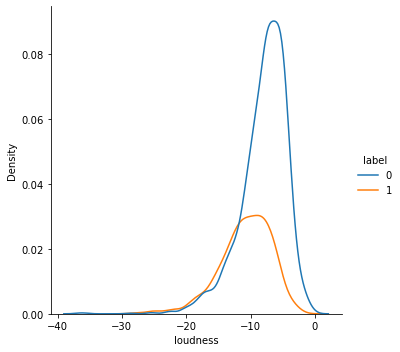

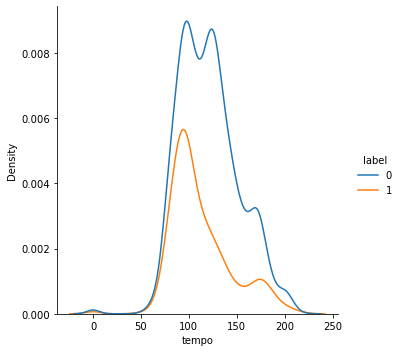

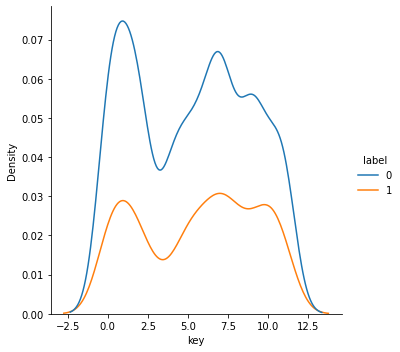

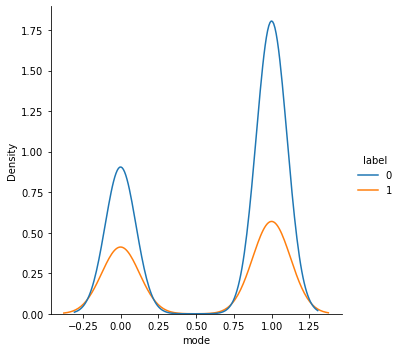

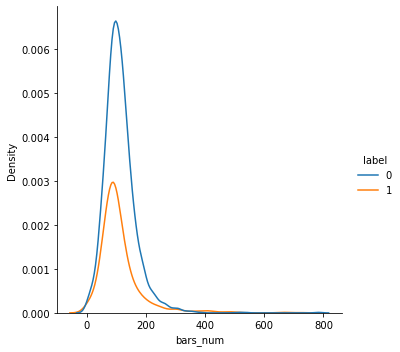

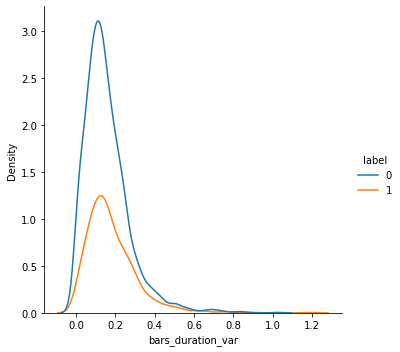

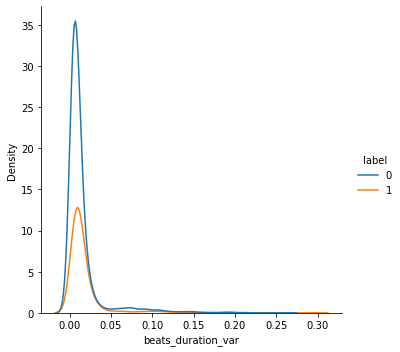

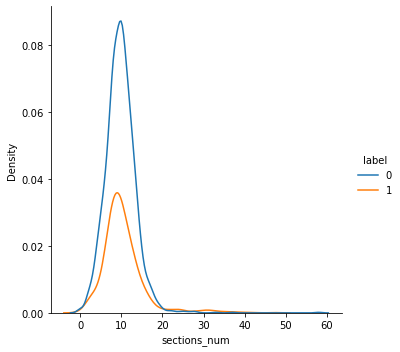

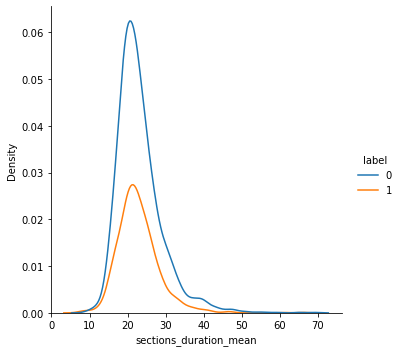

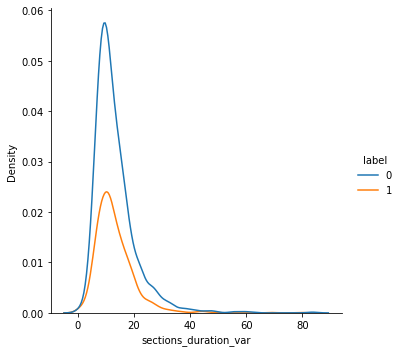

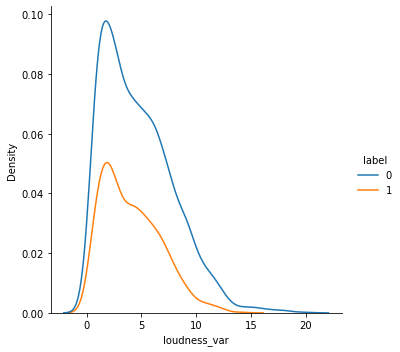

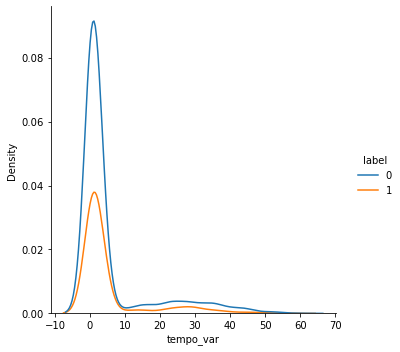

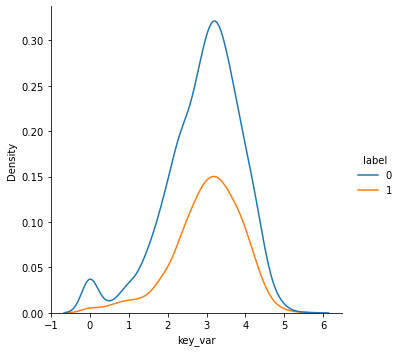

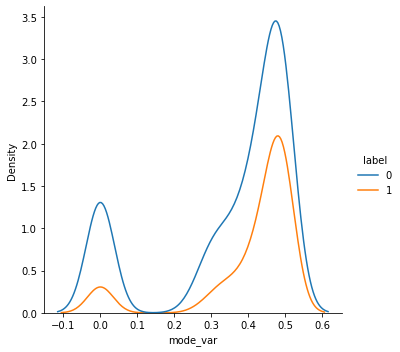

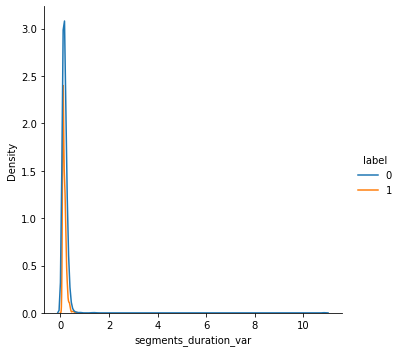

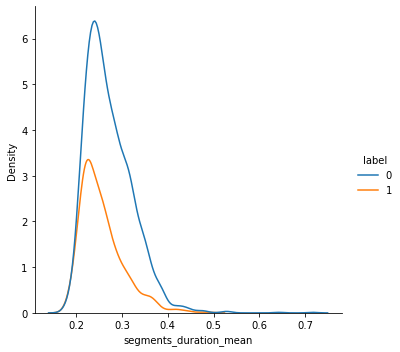

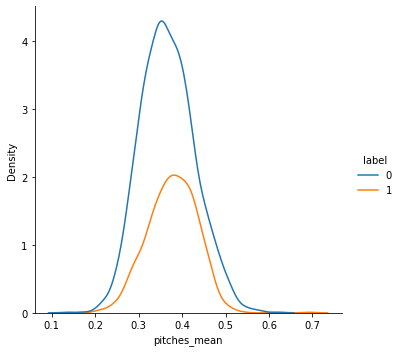

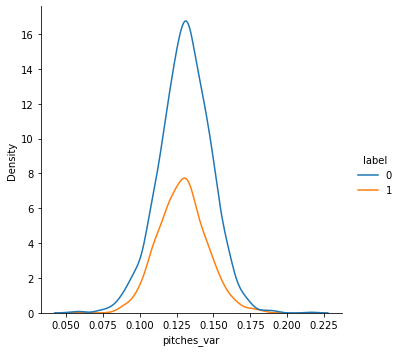

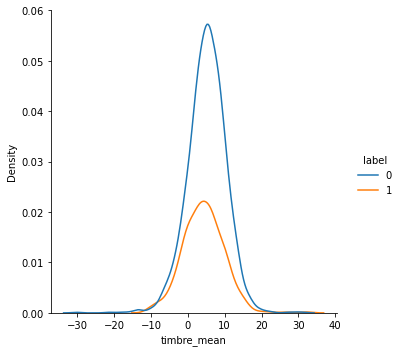

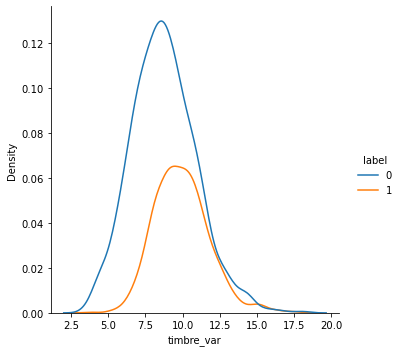

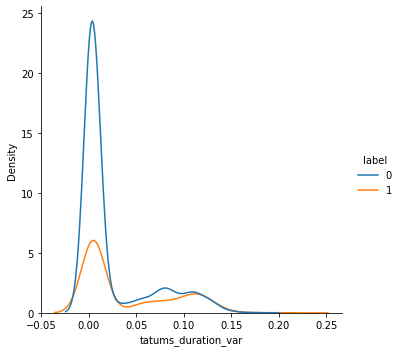

In [10]:
for col in [feat for feat in features if feat not in cols_to_drop]:
    sns.displot(df, x=col, kind='kde', hue='label')

end_of_fade_in, loudness, tempo, key, bars_num, sections_num, sections_duration_mean, sections_duration_var, loudness_var, tempo_var, key_var, segments_duration_var, timbre_mean, and timbre_var needs to be standardized if I want similar ranges for all variables. 

## Now, let's see if we can see how the data cluster